In [108]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

## Data cleaning

### Create separate columns for the rates of mental health conditions and suicide for each gender.

In [109]:
DATASET_FILENAME = "intermediate_suicide_2021.csv" # name of the csv file containing the dataset

In [110]:
suicide_data = pd.read_csv(DATASET_FILENAME)
suicide_data.head()

,location,sex,age,anxiety_percent,bipolar_percent,depress_percent,suicide_rate_per100k,country_code,year,gdp_usd
0,People's Republic of China,Male,15-49 years,0.030089,0.002371,0.025406,7.148372,CHN,2021.0,12617.505104
1,People's Republic of China,Female,15-49 years,0.049990,0.002573,0.041064,4.274235,CHN,2021.0,12617.505104
2,Democratic People's Republic of Korea,Male,15-49 years,0.031223,0.002446,0.023614,10.637906,PRK,2021.0,NaN
3,Democratic People's Republic of Korea,Female,15-49 years,0.052123,0.002546,0.040503,7.770534,PRK,2021.0,NaN
4,Socialist Republic of Viet Nam,Male,15-49 years,0.022690,0.004234,0.026537,11.649648,VNM,2021.0,3704.193559


In [111]:
pivoted = suicide_data.pivot_table(
    index=['location', 'age', 'country_code', 'gdp_usd'], # use these as rows in a MultiIndex
    columns='sex', # maks separate disorder and suicide columns by sex
    values=['anxiety_percent', 'bipolar_percent', 'depress_percent', 'suicide_rate_per100k'] # cols to aggregate
)

pivoted.head() # Results in a table with a MultiIndex for both the index and columns

anxiety_percent  \
sex                                                                Female   
location            age         country_code gdp_usd                        
American Samoa      15-49 years ASM          15236.160488        0.064493   
Antigua and Barbuda 15-49 years ATG          17340.379069        0.086864   
Argentine Republic  15-49 years ARG          10738.017922        0.111099   
Australia           15-49 years AUS          60607.778861        0.109350   
Barbados            15-49 years BRB          18696.785895        0.089775   

                                                                     \
sex                                                            Male   
location            age         country_code gdp_usd                  
American Samoa      15-49 years ASM          15236.160488  0.039367   
Antigua and Barbuda 15-49 years ATG          17340.379069  0.049242   
Argentine Republic  15-49 years ARG          10738.017922  0.057252   
Australia           15-49 years AUS          60607.778861  0.068449   
Barbados            15-49 years BRB          18696.785895  0.051127   

                                                          bipolar_percent  \
sex                                                                Female   
location            age         country_code gdp_usd                        
American Samoa      15-49 years ASM          15236.160488        0.003532   
Antigua and Barbuda 15-49 years ATG          17340.379069        0.013375   
Argentine Republic  15-49 years ARG          10738.017922        0.011635   
Australia           15-49 years AUS          60607.778861        0.016182   
Barbados            15-49 years BRB          18696.785895        0.013237   

                                                                     \
sex                                                            Male   
location            age         country_code gdp_usd                  
American Samoa      15-49 years ASM          15236.160488  0.003448   
Antigua and Barbuda 15-49 years ATG          17340.379069  0.011714   
Argentine Republic  15-49 years ARG          10738.017922  0.009242   
Australia           15-49 years AUS          60607.778861  0.015370   
Barbados            15-49 years BRB          18696.785895  0.011617   

                                                          depress_percent  \
sex                                                                Female   
location            age         country_code gdp_usd                        
American Samoa      15-49 years ASM          15236.160488        0.040142   
Antigua and Barbuda 15-49 years ATG          17340.379069        0.057791   
Argentine Republic  15-49 years ARG          10738.017922        0.055580   
Australia           15-49 years AUS          60607.778861        0.087065   
Barbados            15-49 years BRB          18696.785895        0.060730   

                                                                     \
sex                                                            Male   
location            age         country_code gdp_usd                  
American Samoa      15-49 years ASM          15236.160488  0.030680   
Antigua and Barbuda 15-49 years ATG          17340.379069  0.030021   
Argentine Republic  15-49 years ARG          10738.017922  0.036287   
Australia           15-49 years AUS          60607.778861  0.059841   
Barbados            15-49 years BRB          18696.785895  0.035615   

                                                          suicide_rate_per100k  \
sex                                                                     Female   
location            age         country_code gdp_usd                             
American Samoa      15-49 years ASM          15236.160488             5.571612   
Antigua and Barbuda 15-49 years ATG          17340.379069             0.251559   
Argentine Republic  15-49 years ARG          10738.017922             4.953540   
Australi

In [112]:
pivoted = pivoted.reset_index() # Turn the MultiIndex in the rows into a single index
pivoted.head()

location          age country_code       gdp_usd  \
sex                                                                
0         American Samoa  15-49 years          ASM  15236.160488   
1    Antigua and Barbuda  15-49 years          ATG  17340.379069   
2     Argentine Republic  15-49 years          ARG  10738.017922   
3              Australia  15-49 years          AUS  60607.778861   
4               Barbados  15-49 years          BRB  18696.785895   

    anxiety_percent           bipolar_percent           depress_percent  \
sex          Female      Male          Female      Male          Female   
0          0.064493  0.039367        0.003532  0.003448        0.040142   
1          0.086864  0.049242        0.013375  0.011714        0.057791   
2          0.111099  0.057252        0.011635  0.009242        0.055580   
3          0.109350  0.068449        0.016182  0.015370        0.087065   
4          0.089775  0.051127        0.013237  0.011617        0.060730   

              suicide_rate_per100k             
sex      Male               Female       Male  
0    0.030680             5.571612  19.082456  
1    0.030021             0.251559   2.028625  
2    0.036287             4.953540  21.255442  
3    0.059841             7.524478  25.598084  
4    0.035615             1.165735   6.877231

In [113]:
# Flatten the MultiIndex columns into a single index
pivoted.columns = ['_'.join(col) for col in pivoted.columns.values]

In [114]:
# Clean up column names to be snake case and have no trailing underscores
pivoted.columns = [col.lower().strip("_") for col in pivoted.columns]
pivoted.head()

,location,age,country_code,gdp_usd,anxiety_percent_female,anxiety_percent_male,bipolar_percent_female,bipolar_percent_male,depress_percent_female,depress_percent_male,suicide_rate_per100k_female,suicide_rate_per100k_male
0,American Samoa,15-49 years,ASM,15236.160488,0.064493,0.039367,0.003532,0.003448,0.040142,0.030680,5.571612,19.082456
1,Antigua and Barbuda,15-49 years,ATG,17340.379069,0.086864,0.049242,0.013375,0.011714,0.057791,0.030021,0.251559,2.028625
2,Argentine Republic,15-49 years,ARG,10738.017922,0.111099,0.057252,0.011635,0.009242,0.055580,0.036287,4.953540,21.255442
3,Australia,15-49 years,AUS,60607.778861,0.109350,0.068449,0.016182,0.015370,0.087065,0.059841,7.524478,25.598084
4,Barbados,15-49 years,BRB,18696.785895,0.089775,0.051127,0.013237,0.011617,0.060730,0.035615,1.165735,6.877231


In [115]:
# Set the index to a MultiIndex whose levels are the country name and country code

pivoted = pivoted.set_index(["location", "country_code"]) # Set the index to the country name
pivoted = pivoted.drop(columns=["age"]) # drop age column
pivoted.head()

,,gdp_usd,anxiety_percent_female,anxiety_percent_male,bipolar_percent_female,bipolar_percent_male,depress_percent_female,depress_percent_male,suicide_rate_per100k_female,suicide_rate_per100k_male
location,country_code,,,,,,,,,
American Samoa,ASM,15236.160488,0.064493,0.039367,0.003532,0.003448,0.040142,0.030680,5.571612,19.082456
Antigua and Barbuda,ATG,17340.379069,0.086864,0.049242,0.013375,0.011714,0.057791,0.030021,0.251559,2.028625
Argentine Republic,ARG,10738.017922,0.111099,0.057252,0.011635,0.009242,0.055580,0.036287,4.953540,21.255442
Australia,AUS,60607.778861,0.109350,0.068449,0.016182,0.015370,0.087065,0.059841,7.524478,25.598084
Barbados,BRB,18696.785895,0.089775,0.051127,0.013237,0.011617,0.060730,0.035615,1.165735,6.877231


In [116]:
pivoted.isna().sum()

gdp_usd                        0
anxiety_percent_female         0
anxiety_percent_male           0
bipolar_percent_female         0
bipolar_percent_male           0
depress_percent_female         0
depress_percent_male           0
suicide_rate_per100k_female    0
suicide_rate_per100k_male      0
dtype: int64

There is no missing data.

### Split by gender

Now, we will make separate DataFrames containing the mental health disorder rates and suicide rates for men and women, respectively. Both DataFrames will have GDP.

In [117]:
male_cols = [col for col in pivoted.columns if not col.endswith("_female")] # All the columns we will have in the dataset for men (GDP and prevalences for men)
female_cols = [col for col in pivoted.columns if not col.endswith("_male")] # All the columns we will have in the dataset for women (GDP and prevalences for women)

male_df = pivoted[male_cols] # Dataset with male suicide rates and statistics
female_df = pivoted[female_cols] # Dataset with female suicide rates and statistics

In [118]:
male_df.head() 

,,gdp_usd,anxiety_percent_male,bipolar_percent_male,depress_percent_male,suicide_rate_per100k_male
location,country_code,,,,,
American Samoa,ASM,15236.160488,0.039367,0.003448,0.030680,19.082456
Antigua and Barbuda,ATG,17340.379069,0.049242,0.011714,0.030021,2.028625
Argentine Republic,ARG,10738.017922,0.057252,0.009242,0.036287,21.255442
Australia,AUS,60607.778861,0.068449,0.015370,0.059841,25.598084
Barbados,BRB,18696.785895,0.051127,0.011617,0.035615,6.877231


In [119]:
female_df.head()

,,gdp_usd,anxiety_percent_female,bipolar_percent_female,depress_percent_female,suicide_rate_per100k_female
location,country_code,,,,,
American Samoa,ASM,15236.160488,0.064493,0.003532,0.040142,5.571612
Antigua and Barbuda,ATG,17340.379069,0.086864,0.013375,0.057791,0.251559
Argentine Republic,ARG,10738.017922,0.111099,0.011635,0.055580,4.953540
Australia,AUS,60607.778861,0.109350,0.016182,0.087065,7.524478
Barbados,BRB,18696.785895,0.089775,0.013237,0.060730,1.165735


## EDA

### Helper functions

We will define two helper functions for EDA, one that plots a heatmap of the correlation matrix, and one that makes a pairplot of a dataset.

In [120]:
def plot_heatmap(df: pd.DataFrame, figsize: tuple[int] = (10,8), title: str = "Correlation Matrix for Suicide Data"):
    """
    Plots the heatmap of the correlation matrix of a dataset.
    Parameters
        - df: the dataframe to plot
        - figsize: a tuple of integers for the figure size
        - title: title of the plot
    """
    plt.figure(figsize=figsize)
    sns.heatmap(df.corr(), annot=True, cmap="viridis")
    plt.title(title, fontsize=20)
    plt.show()

In [121]:
def make_pairplot(df: pd.DataFrame, figsize: tuple[int] = (12,12), title: str = "Pairplot for Suicide Data"):
    """ 
    Make a pairplot of a dataset 
    Params:
        - df: the dataframe to plot
        - figsize: a tuple of integers for the figure size
        - title: title of the plot
    """
    grid = sns.PairGrid(df, corner=True)
    grid.map_lower(sns.scatterplot, alpha=0.6)
    grid.map_diag(sns.histplot)
    grid.figure.set_size_inches(figsize)
    grid.figure.suptitle(title)

### Male dataset

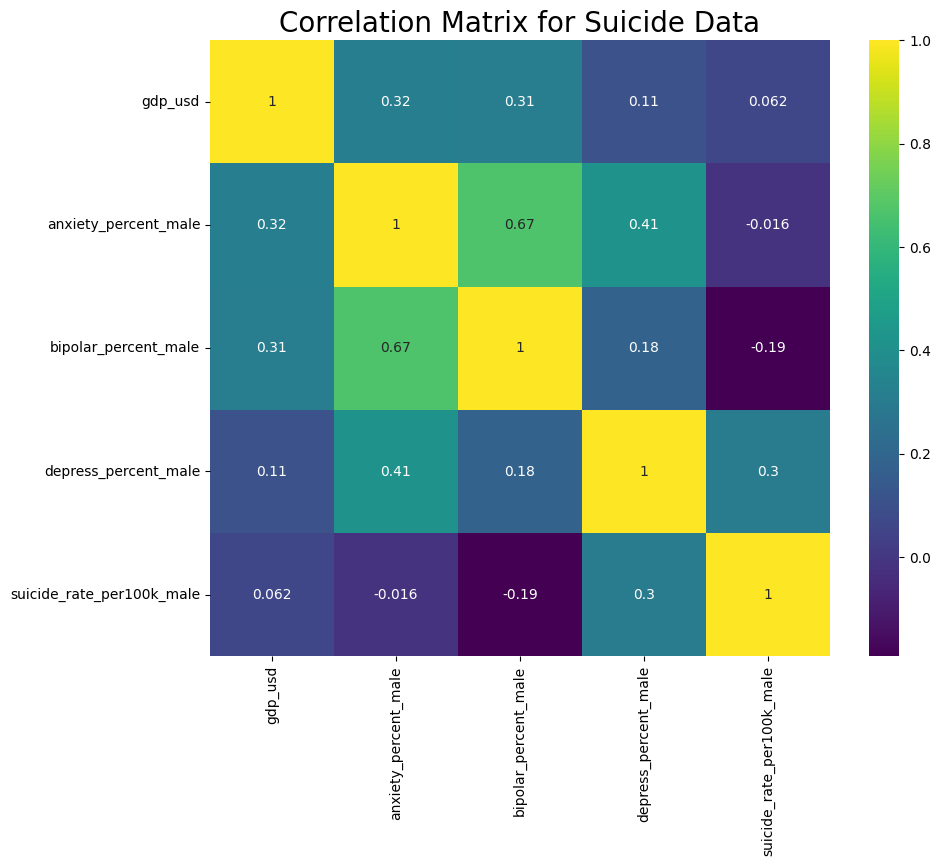

In [122]:
plot_heatmap(male_df)

[Interpretation here]

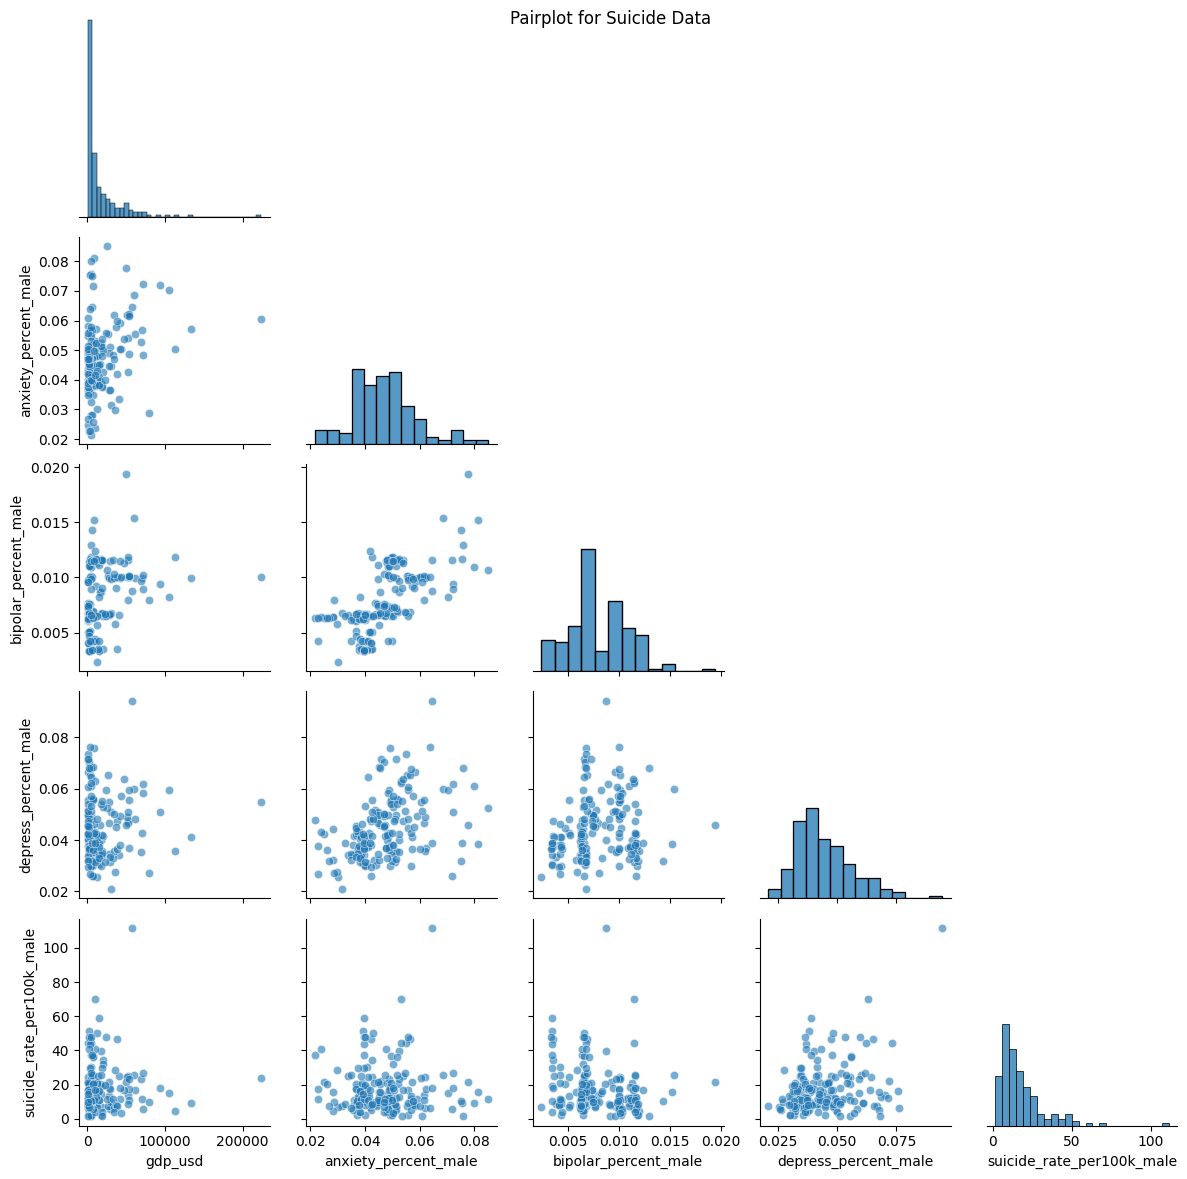

In [123]:
make_pairplot(male_df)

We see a nonlinear relationship between all the predictors and the response. So, we will use spline terms in the GAM.

### Female dataset

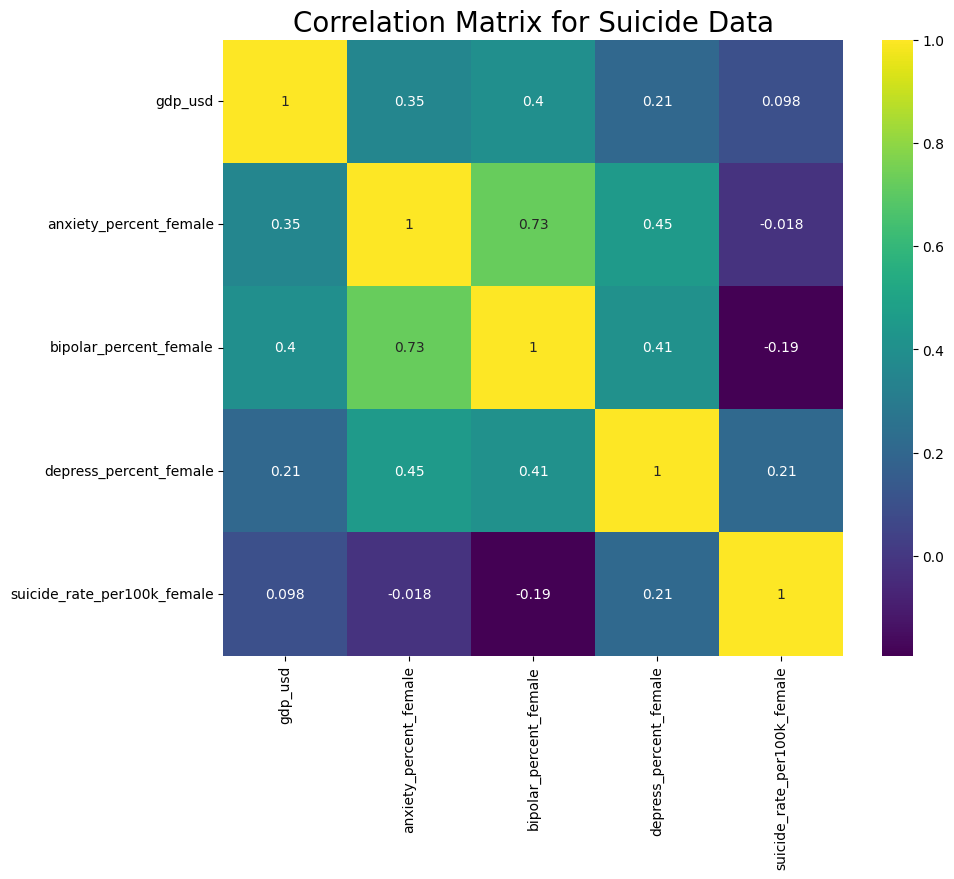

In [124]:
plot_heatmap(female_df)

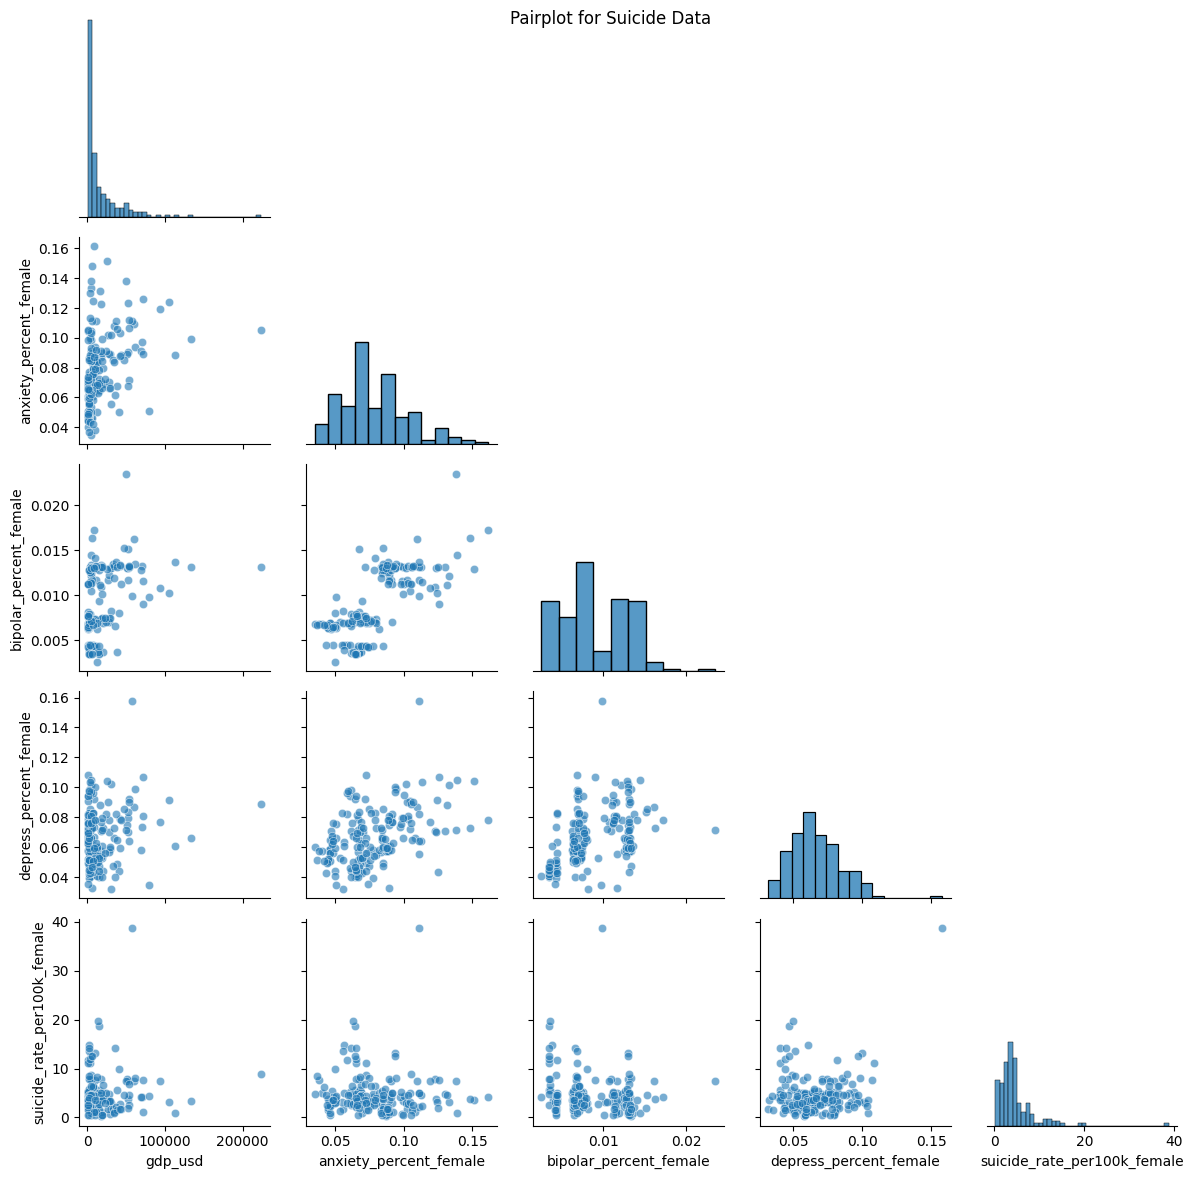

In [125]:
make_pairplot(female_df)

Again, we see a nonlinear relationship between all the predictors and the response. So, we will use spline terms in the GAM.

## Train/test split and scaling

### Train/test split

We will split the data into a training and test set by generating random indices for each set.

In [126]:
all_indices = np.arange(len(female_df)) # integer index from 0 to the number of samples
train_indices = np.random.choice(all_indices, size=int(0.8 * len(all_indices)), replace=False) # indices of the training set
test_indices = list( set(all_indices) - set(train_indices) ) # Get the indices of the test set by taking all the indices that are NOT in the training set

In [127]:
# Training and test sets for male data
male_df_train = male_df.iloc[train_indices]
male_df_test = male_df.iloc[test_indices]

X_train_male = male_df_train.drop(columns=["suicide_rate_per100k_male"]) # predictors in male training set
Y_train_male = male_df_train["suicide_rate_per100k_male"] # response in male training set

X_test_male = male_df_test.drop(columns=["suicide_rate_per100k_male"]) # predictors in male test set
Y_test_male = male_df_test["suicide_rate_per100k_male"] # response in male test set

# Training and test sets for female data
female_df_train = female_df.iloc[train_indices]
female_df_test = female_df.iloc[test_indices]

# Same predictors and response for female dataset
X_train_female = female_df_train.drop(columns=["suicide_rate_per100k_female"]) 
Y_train_female = female_df_train["suicide_rate_per100k_female"] 

X_test_female = female_df_test.drop(columns=["suicide_rate_per100k_female"]) 
Y_test_female = female_df_test["suicide_rate_per100k_female"] 

### Scaling

Now, we will perform standardization on each dataset.

In [128]:
male_scaler = StandardScaler()
X_train_male_scaled = pd.DataFrame(male_scaler.fit_transform(X_train_male), columns = X_train_male.columns, index = X_train_male.index)
X_test_male_scaled = pd.DataFrame(male_scaler.transform(X_test_male), columns = X_test_male.columns, index = X_test_male.index)

female_scaler = StandardScaler()
X_train_female_scaled = pd.DataFrame(female_scaler.fit_transform(X_train_female), columns = X_train_female.columns, index = X_train_female.index)
X_test_female_scaled = pd.DataFrame(female_scaler.transform(X_test_female), columns = X_test_female.columns, index = X_test_female.index)

In [129]:
X_train_male_scaled.head()

,,gdp_usd,anxiety_percent_male,bipolar_percent_male,depress_percent_male
location,country_code,,,,
Republic of Iraq,IRQ,-0.523526,0.372516,0.445118,0.323879
United Republic of Tanzania,TZA,-0.675195,0.004593,-0.153262,0.078888
Islamic Republic of Pakistan,PAK,-0.663111,-0.499627,-1.015667,-0.155966
Kingdom of Saudi Arabia,SAU,0.438658,0.201731,0.802529,0.892821
Republic of Singapore,SGP,2.532750,-1.620927,0.064549,-1.468215


In [130]:
X_train_female_scaled.head()

,,gdp_usd,anxiety_percent_female,bipolar_percent_female,depress_percent_female
location,country_code,,,,
Republic of Iraq,IRQ,-0.523526,1.202624,0.482984,0.324773
United Republic of Tanzania,TZA,-0.675195,-0.450737,-0.297987,0.170855
Islamic Republic of Pakistan,PAK,-0.663111,-0.864033,-1.238507,-0.185817
Kingdom of Saudi Arabia,SAU,0.438658,0.524636,1.013079,0.692997
Republic of Singapore,SGP,2.532750,-1.097134,0.305437,-1.821159


## Modeling: GAM

### Male dataset

In [131]:
from pygam import LinearGAM, s

Below, we fit a GAM model on the male dataset. Each predictor is represented by a spline term. `s(feature = i)` means we are fitting a spline term to the i-th feature.

In [132]:
male_gam = LinearGAM(s(feature=0) + s(feature=1) + s(feature=2) + s(feature=3)).fit(X_train_male_scaled, Y_train_male)

In [133]:
male_gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     33.6119
Link Function:                     IdentityLink Log Likelihood:                                  -794.3411
Number of Samples:                          144 AIC:                                              1657.906
                                                AICc:                                            1680.6501
                                                GCV:                                              167.1686
                                                Scale:                                             98.8339
                                                Pseudo R-Squared:                                   0.4951
Feature Function                  Lam

C:\Users\david\AppData\Local\Temp\ipykernel_25044\425402196.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  male_gam.summary()


Each spline term has a penalty on its second derivative that encourages the function to be smoother. `male_gam.lam` are the strengths of that penalty for each term. Terms can have multiple `lam`s, but here, there are four `lam` parameters, one for each term.

In [134]:
male_gam.lam

[[0.6], [0.6], [0.6], [0.6]]

We will now perform grid search to find the best `lam` values. We will minimize the generalized cross-validation (GCV) score.

In [135]:
lam = np.logspace(-3, 5, 5) # For each lam, try 5 possible values, log-spaced
lams = [lam] * 4 # Replicate these values for all 4 lams by making a list of 1 x 5 arrays, one for each term

# Perform grid search and change the male_gam variable to the best model found
male_gam.gridsearch(X = X_train_male_scaled, y = Y_train_male, lam=lams, objective='GCV')

  0% (0 of 625) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
  0% (1 of 625) |                        | Elapsed Time: 0:00:00 ETA:   0:02:39
  0% (2 of 625) |                        | Elapsed Time: 0:00:00 ETA:   0:01:54
  0% (3 of 625) |                        | Elapsed Time: 0:00:00 ETA:   0:01:45
  0% (4 of 625) |                        | Elapsed Time: 0:00:00 ETA:   0:01:45
  0% (5 of 625) |                        | Elapsed Time: 0:00:00 ETA:   0:01:36
  0% (6 of 625) |                        | Elapsed Time: 0:00:00 ETA:   0:01:31
  1% (7 of 625) |                        | Elapsed Time: 0:00:01 ETA:   0:01:30
  1% (8 of 625) |                        | Elapsed Time: 0:00:01 ETA:   0:01:31
  1% (9 of 625) |                        | Elapsed Time: 0:00:01 ETA:   0:01:29
  1% (10 of 625) |                       | Elapsed Time: 0:00:01 ETA:   0:01:28
  1% (11 of 625) |                       | Elapsed Time: 0:00:01 ETA:   0:01:30
  1% (12 of 625) |                      

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + intercept, tol=0.0001, 
   verbose=False)

In [136]:
male_gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     20.4112
Link Function:                     IdentityLink Log Likelihood:                                  -798.8698
Number of Samples:                          144 AIC:                                             1640.5621
                                                AICc:                                            1648.4551
                                                GCV:                                              136.1971
                                                Scale:                                            101.9579
                                                Pseudo R-Squared:                                   0.4168
Feature Function                  Lam

C:\Users\david\AppData\Local\Temp\ipykernel_25044\425402196.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  male_gam.summary()


In [137]:
male_gam.lam

[[1000.0], [100000.0], [0.001], [1000.0]]

The best `lam` values found are 10, 10, 0.1, and 10, in the order of the terms or features.

### Female dataset